In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree

In [2]:
data = {
    'Sample Seam': ['S–14', 'S–14', 'S–13', 'S–16', 'S-11', 'S–11',
                    'S–11', 'S–12', 'S-10', 'S-10', 'S-09'],
    'Mine Name': ['Chasnala', 'Jitpur', 'Chasnala', 'Jitpur', 'Enna', 'Bhalgora', 'Simlabahal', 'Simlabahal', 'Bhalgora',
             'Simlabahal', 'Simlabahal'],
    'Moisture (%wt)': [1.14, 1.18, 1.16, 1.30, 0.61, 1.22, 1.25, 1.13, 0.64, 0.63, 0.92],
    'Ash (%wt)': [10.31, 10.84, 7.78, 9.34, 20.94, 16.71, 13.40, 16.74, 17.19, 16.75, 16.88],
    'Volatile Matter (%wt)': [30.69, 29.54, 32.44, 30.06, 26.95, 28.26, 27.22, 26.42, 24.86, 25.08, 27.02],
    'Fixed Carbon (%wt)': [61.37, 61.99, 61.52, 62.50, 57.31, 58.88, 62.11, 60.44, 61.74, 61.90, 59.99],
    'C (%wt)': [77.16, 79.77, 79.85, 79.12, 81.31, 83.96, 82.10, 79.99, 83.94, 84.14, 83.53],
    'H (%wt)': [4.92, 4.81, 5.28, 4.91, 5.02, 5.06, 4.69, 4.81, 4.73, 4.95, 4.94],
    'N (%wt)': [1.52, 1.58, 1.57, 1.43, 1.62, 1.88, 1.73, 1.64, 1.90, 1.90, 2.00],
    'S (%wt)': [0.28, 0.27, 0.31, 0.32, 0.00, 0.54, 0.41, 0.50, 0.35, 0.39, 0.50],
    'O (%wt)': [16.10, 13.57, 12.98, 14.21, 12.06, 8.57, 11.07, 13.05, 9.08, 8.63, 9.04],
    'Calorific Value (MJ/kg)': [29.64, 28.86, 29.29, 28.68, 25.59, 27.42, 28.34, 27.24, 26.72, 27.46, 26.77],
    'Vitrinite Reflectance (VRm)': [0.74, 0.76, 0.87, 0.97, 1.00, 1.02, 1.15, 1.08, 1.04, 1.05, 1.09],
    'CPT (°C)': [145, 142, 136, 152, 169, 171, 159, 152, 165, 168, 162]
}

df = pd.DataFrame(data)
df


,Sample Seam,Mine Name,Moisture (%wt),Ash (%wt),Volatile Matter (%wt),Fixed Carbon (%wt),C (%wt),H (%wt),N (%wt),S (%wt),O (%wt),Calorific Value (MJ/kg),Vitrinite Reflectance (VRm),CPT (°C)
0,S–14,Chasnala,1.14,10.31,30.69,61.37,77.16,4.92,1.52,0.28,16.10,29.64,0.74,145
1,S–14,Jitpur,1.18,10.84,29.54,61.99,79.77,4.81,1.58,0.27,13.57,28.86,0.76,142
2,S–13,Chasnala,1.16,7.78,32.44,61.52,79.85,5.28,1.57,0.31,12.98,29.29,0.87,136
3,S–16,Jitpur,1.30,9.34,30.06,62.50,79.12,4.91,1.43,0.32,14.21,28.68,0.97,152
4,S-11,Enna,0.61,20.94,26.95,57.31,81.31,5.02,1.62,0.00,12.06,25.59,1.00,169
5,S–11,Bhalgora,1.22,16.71,28.26,58.88,83.96,5.06,1.88,0.54,8.57,27.42,1.02,171
6,S–11,Simlabahal,1.25,13.40,27.22,62.11,82.10,4.69,1.73,0.41,11.07,28.34,1.15,159
7,S–12,Simlabahal,1.13,16.74,26.42,60.44,79.99,4.81,1.64,0.50,13.05,27.24,1.08,152
8,S-10,Bhalgora,0.64,17.19,24.86,61.74,83.94,4.73,1.90,0.35,9.08,26.72,1.04,165
9,S-10,Simlabahal,0.63,16.75,25.08,61.90,84.14,4.95,1.90,0.39,8.63,27.46,1.05,168


In [3]:
df.shape

(11, 14)

In [4]:
df.columns

Index(['Sample Seam', 'Mine Name', 'Moisture (%wt)', 'Ash (%wt)',
       'Volatile Matter (%wt)', 'Fixed Carbon (%wt)', 'C (%wt)', 'H (%wt)',
       'N (%wt)', 'S (%wt)', 'O (%wt)', 'Calorific Value (MJ/kg)',
       'Vitrinite Reflectance (VRm)', 'CPT (°C)'],
      dtype='object')

In [5]:
df = df.drop(columns='Sample Seam')
df = df.drop(columns='Mine Name')
df

,Moisture (%wt),Ash (%wt),Volatile Matter (%wt),Fixed Carbon (%wt),C (%wt),H (%wt),N (%wt),S (%wt),O (%wt),Calorific Value (MJ/kg),Vitrinite Reflectance (VRm),CPT (°C)
0,1.14,10.31,30.69,61.37,77.16,4.92,1.52,0.28,16.10,29.64,0.74,145
1,1.18,10.84,29.54,61.99,79.77,4.81,1.58,0.27,13.57,28.86,0.76,142
2,1.16,7.78,32.44,61.52,79.85,5.28,1.57,0.31,12.98,29.29,0.87,136
3,1.30,9.34,30.06,62.50,79.12,4.91,1.43,0.32,14.21,28.68,0.97,152
4,0.61,20.94,26.95,57.31,81.31,5.02,1.62,0.00,12.06,25.59,1.00,169
5,1.22,16.71,28.26,58.88,83.96,5.06,1.88,0.54,8.57,27.42,1.02,171
6,1.25,13.40,27.22,62.11,82.10,4.69,1.73,0.41,11.07,28.34,1.15,159
7,1.13,16.74,26.42,60.44,79.99,4.81,1.64,0.50,13.05,27.24,1.08,152
8,0.64,17.19,24.86,61.74,83.94,4.73,1.90,0.35,9.08,26.72,1.04,165
9,0.63,16.75,25.08,61.90,84.14,4.95,1.90,0.39,8.63,27.46,1.05,168


In [6]:
x = df.drop('CPT (°C)', axis = 1) # Features
y = df['CPT (°C)']  # Target
X_train,X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
X_train

,Moisture (%wt),Ash (%wt),Volatile Matter (%wt),Fixed Carbon (%wt),C (%wt),H (%wt),N (%wt),S (%wt),O (%wt),Calorific Value (MJ/kg),Vitrinite Reflectance (VRm)
8,0.64,17.19,24.86,61.74,83.94,4.73,1.90,0.35,9.08,26.72,1.04
4,0.61,20.94,26.95,57.31,81.31,5.02,1.62,0.00,12.06,25.59,1.00
3,1.30,9.34,30.06,62.50,79.12,4.91,1.43,0.32,14.21,28.68,0.97
6,1.25,13.40,27.22,62.11,82.10,4.69,1.73,0.41,11.07,28.34,1.15
10,0.92,16.88,27.02,59.99,83.53,4.94,2.00,0.50,9.04,26.77,1.09
9,0.63,16.75,25.08,61.90,84.14,4.95,1.90,0.39,8.63,27.46,1.05
2,1.16,7.78,32.44,61.52,79.85,5.28,1.57,0.31,12.98,29.29,0.87
0,1.14,10.31,30.69,61.37,77.16,4.92,1.52,0.28,16.10,29.64,0.74


In [8]:
Y_train

8     165
4     169
3     152
6     159
10    162
9     168
2     136
0     145
Name: CPT (°C), dtype: int64

In [9]:
lr = RandomForestRegressor()
lr.fit(X_train, Y_train)

RandomForestRegressor()

In [10]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9147239669421489


In [11]:
def get_mape(y_true, y_pred):
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
Y_train_pred = lr.predict(X_train)
# Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [13]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))
print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.91
Training Explained Variation:  0.91
Training MAPE: 1.43
Training Mean Squared Error: 10.32
Training RMSE:  3.21
Training MAE:  2.17
 
Test R-squared:  0.7
Test Explained Variation:  0.71
Test MAPE: 4.18
Test Mean Squared Error: 43.68
Test RMSE:  6.61
Test MAE:  6.52


In [14]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()
df_pred

,index,Actual,Predicted
0,7,152,158.11
1,1,142,147.45
2,5,171,163.00


<AxesSubplot: >

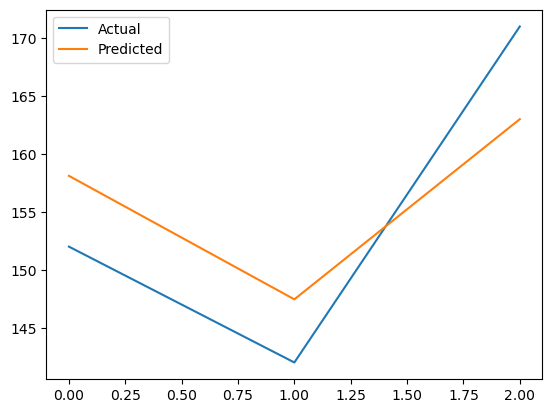

In [15]:
df_pred[['Actual', 'Predicted']].plot()

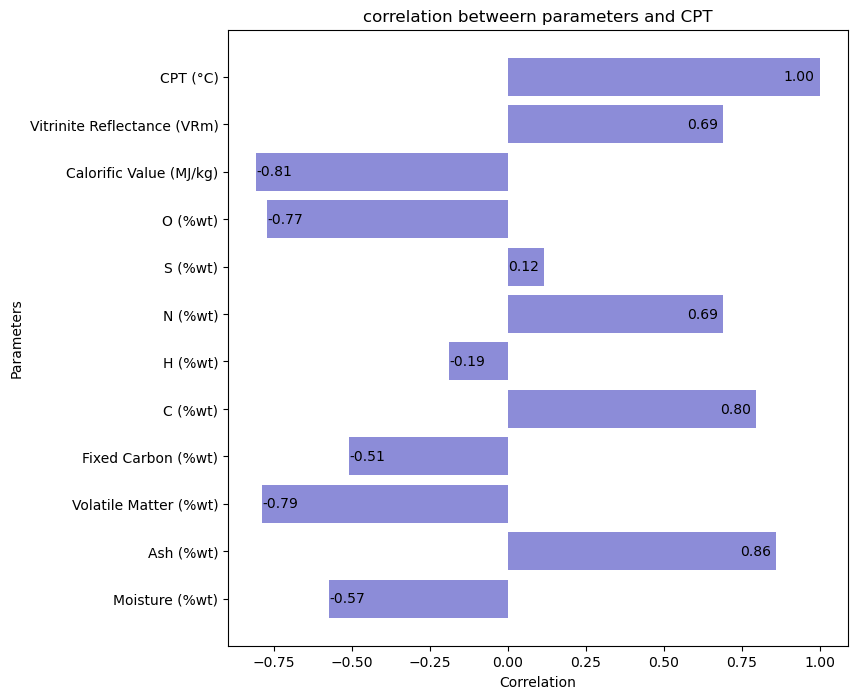

In [16]:
data = df.corr()
courses = data.columns
values = data['CPT (°C)']
  
fig = plt.figure(figsize = (8, 8))
 
# creating the bar plot
bars = plt.barh(courses, values, color=(0.1, 0.1, 0.7, 0.5))

plt.bar_label(bars,fmt='%.2f',label_type='edge',padding=-26)
plt.xlabel("Correlation")
plt.ylabel("Parameters")
plt.title("correlation betweern parameters and CPT")
plt.show()

In [17]:
df.corr()['CPT (°C)']

Moisture (%wt)                -0.573389
Ash (%wt)                      0.858422
Volatile Matter (%wt)         -0.786662
Fixed Carbon (%wt)            -0.508821
C (%wt)                        0.796311
H (%wt)                       -0.188262
N (%wt)                        0.689006
S (%wt)                        0.116308
O (%wt)                       -0.771717
Calorific Value (MJ/kg)       -0.805671
Vitrinite Reflectance (VRm)    0.689290
CPT (°C)                       1.000000
Name: CPT (°C), dtype: float64